<a href="https://colab.research.google.com/github/Divyarka/Case-studies/blob/main/Eatfit-meal_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

# Reading Datasets:



> ### Week data CSV



In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Tableau project/Weekly_Demand_Data.csv')
history.head(40)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [ ]:
history.shape

(456548, 9)

In [ ]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [ ]:
history.week.nunique()

145

In [ ]:
history.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
history.emailer_for_promotion.value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [ ]:
history.homepage_featured.value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [ ]:
history.meal_id.nunique()

51

In [ ]:
history.center_id.nunique()

77

**PRELIMINARY OBSERVATIONS:**

The week column suggests that the dataset spans over 145 weeks, i.e. 2.5 yrs.

Email promo column assumes only 0 & 1 values. Same with Homepage featured column.

51 meal types reported in the dataset.

77 distinct centres covered in the dataset.

Each entry/row describes one centre-meal combination in a particular week.

In [ ]:
# Rectifying data types:

history['emailer_for_promotion'] = history['emailer_for_promotion'].astype('category')
history['homepage_featured'] = history['homepage_featured'].astype('category')

history.dtypes

id                          int64
week                        int64
center_id                   int64
meal_id                     int64
checkout_price            float64
base_price                float64
emailer_for_promotion    category
homepage_featured        category
num_orders                  int64
dtype: object



> ### Meal info CSV



In [ ]:
meal = pd.read_csv('/content/drive/MyDrive/Tableau project/Meal_Info.csv')
meal.head(10)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
meal.dtypes

meal_id      int64
category    object
cuisine     object
dtype: object

In [ ]:
meal.meal_id.nunique()

51

In [ ]:
meal.cuisine.value_counts()

Thai           15
Indian         12
Italian        12
Continental    12
Name: cuisine, dtype: int64

In [ ]:
meal.category.nunique()

14

In [ ]:
meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

**PRELIMINARY OBSERVATIONS:**

Meal Id has 51 distinct entries which matches with that of the history dataset.

Category and cuisine contain categorical values.

No missing values anywhere.

In [ ]:
# Rectifying data types:

meal['category'] = meal['category'].astype('category')
meal['cuisine'] = meal['cuisine'].astype('category')

meal.dtypes

meal_id        int64
category    category
cuisine     category
dtype: object



 > ### Fulfilment centre info CSV



In [ ]:
centres = pd.read_csv('/content/drive/MyDrive/Tableau project/fulfilment_center_info.csv')
centres.head(10)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
5,64,553,77,TYPE_A,4.4
6,129,593,77,TYPE_A,3.9
7,139,693,34,TYPE_C,2.8
8,88,526,34,TYPE_A,4.1
9,143,562,77,TYPE_B,3.8


In [ ]:
centres.dtypes

center_id        int64
city_code        int64
region_code      int64
center_type     object
op_area        float64
dtype: object

In [ ]:
centres.center_id.nunique()

77

In [ ]:
centres.city_code.nunique()

51

In [ ]:
centres.region_code.nunique()

8

In [ ]:
centres.center_type.value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

**PRELIMINARY OBSERVATIONS:**

There are 77 unique centers as validated by the history dataset as well.

There are 3 classes of center type.

In [ ]:
# Rectifying datatypes:

centres['center_type'] = centres['center_type'].astype('category')
centres.dtypes

center_id         int64
city_code         int64
region_code       int64
center_type    category
op_area         float64
dtype: object

In [ ]:
# Joining the datasets:
table = history.merge(meal, how='left', on=['meal_id'])
data = table.merge(centres, how='left', on=['center_id'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     456548 non-null  int64   
 1   week                   456548 non-null  int64   
 2   center_id              456548 non-null  int64   
 3   meal_id                456548 non-null  int64   
 4   checkout_price         456548 non-null  float64 
 5   base_price             456548 non-null  float64 
 6   emailer_for_promotion  456548 non-null  category
 7   homepage_featured      456548 non-null  category
 8   num_orders             456548 non-null  int64   
 9   category               456548 non-null  category
 10  cuisine                456548 non-null  category
 11  city_code              456548 non-null  int64   
 12  region_code            456548 non-null  int64   
 13  center_type            456548 non-null  category
 14  op_area             

# Univariate Analysis



> ### Numerical Univariate



In [ ]:
# segregating the numeric data types:
data.select_dtypes(include=['int64', 'float64']).dtypes

id                  int64
week                int64
center_id           int64
meal_id             int64
checkout_price    float64
base_price        float64
num_orders          int64
city_code           int64
region_code         int64
op_area           float64
dtype: object

In [ ]:
def UVA_num(data, var):

  plt.figure(figsize=(4,2), dpi=140)
  sns.kdeplot(data[var], shade=True)


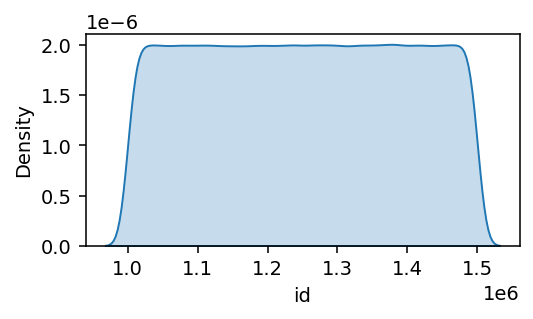

In [ ]:
UVA_num(data, 'id')

In [ ]:
data.id.nunique()

456548

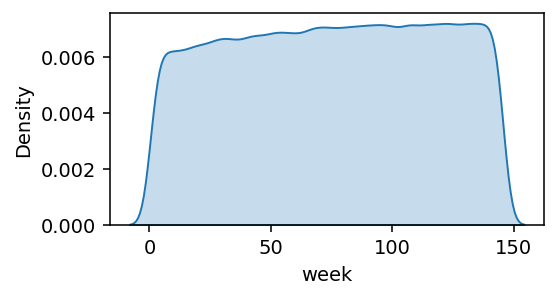

In [ ]:
UVA_num(data, 'week')

The no of observations in a week shows increasing trend, which suggests that either the no of centres or the variety of Items has been rising steadily, indicating good business expansion.

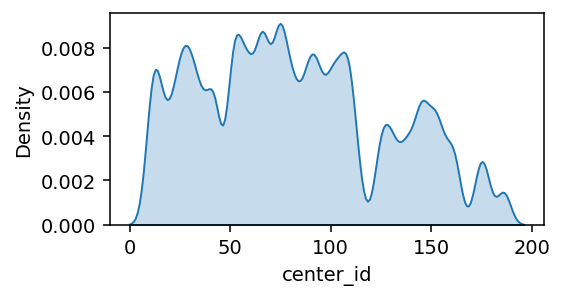

In [ ]:
UVA_num(data, 'center_id')

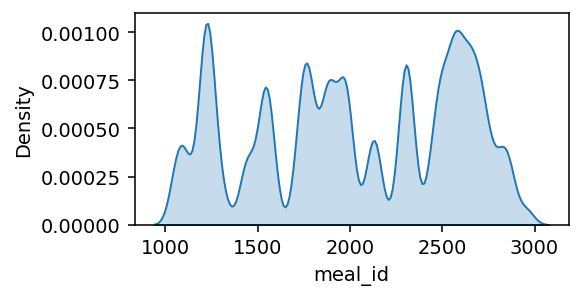

In [ ]:
UVA_num(data, 'meal_id')

There are certain **centers** that apparently report more sales than others.

Similarly there are certain **meals** that are sold more often than others.

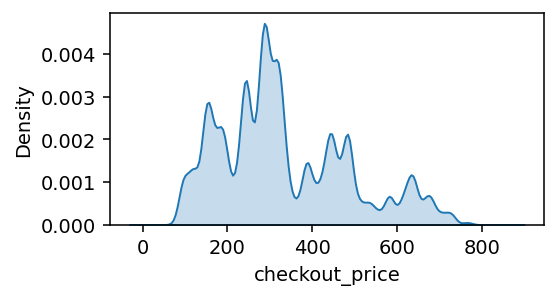

In [ ]:
UVA_num(data, 'checkout_price')

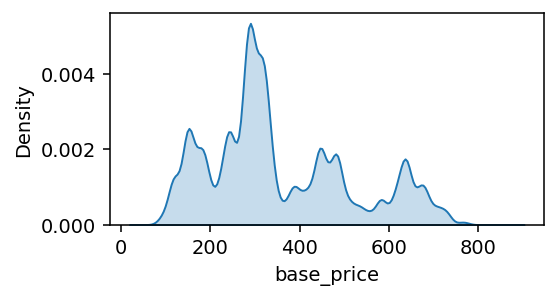

In [ ]:
UVA_num(data, 'base_price')

The commodity ranging between $200-400 appears to be the most common one, sold across centers, as it features in the data most frequently.

Could be the most popular also?

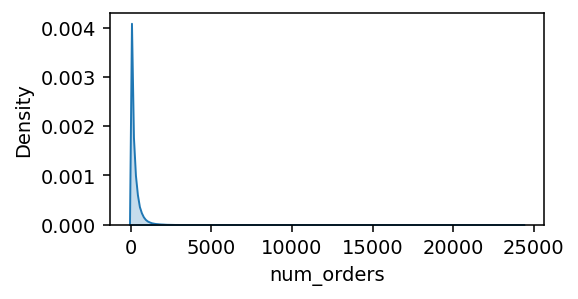

In [ ]:
UVA_num(data, 'num_orders')

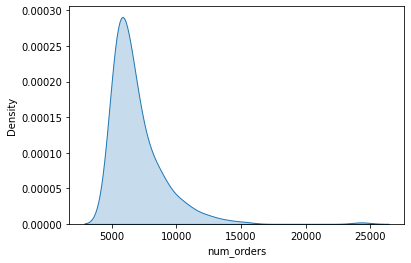

In [ ]:
datasub = data.num_orders[data['num_orders']>5000]
sns.kdeplot(datasub, shade=True)

Majority of commodities, had below 1000 orders.

However there are certain commoditites whose orders surpass 10000, could be Outliers.



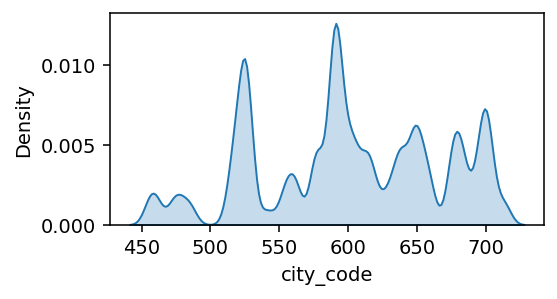

In [ ]:
UVA_num(data, 'city_code')

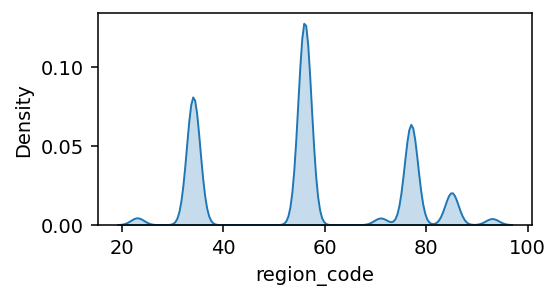

In [ ]:
UVA_num(data, 'region_code')

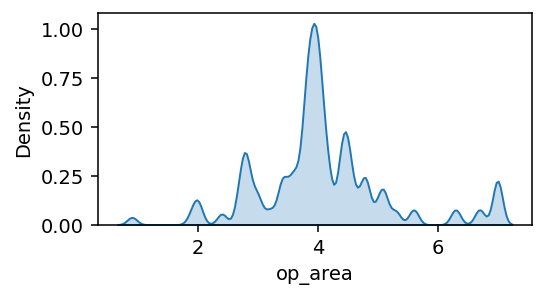

In [ ]:
UVA_num(data, 'op_area')

In [ ]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,24299.000000,713.000000,93.000000,7.000000


From the description of the dataset, we observe that:

The least base price of any meal is: $55

The least price for which a meal was sold: $2.97

The lowest number of orders sold by any center of a particular item is 13. And the Highest no: 24299



>  ### Categorical Univariate



In [ ]:
data.select_dtypes(include='category').dtypes

emailer_for_promotion    category
homepage_featured        category
category                 category
cuisine                  category
center_type              category
dtype: object

In [ ]:
def UVA_cat(data, var):

  norm = data[var].value_counts(normalize=True)

  plt.figure(figsize=(8,2), dpi=140)
  plt.subplot(1,2,1)
  sns.countplot(data[var])

  plt.subplot(1,2,2)
  sns.barplot(norm, norm.index, order=norm.index)


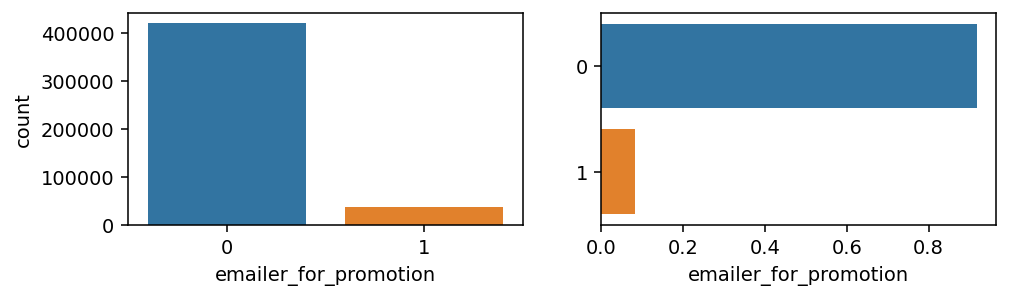

In [ ]:
UVA_cat(data, 'emailer_for_promotion')

More than 90% of the center-meal combination instances there was no email for promotion.

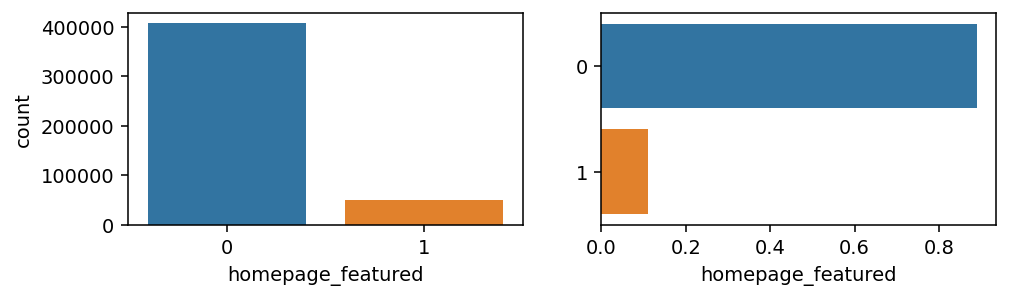

In [ ]:
UVA_cat(data, 'homepage_featured')

Around 90% of the center-meal combinations were not featured on the homepage.

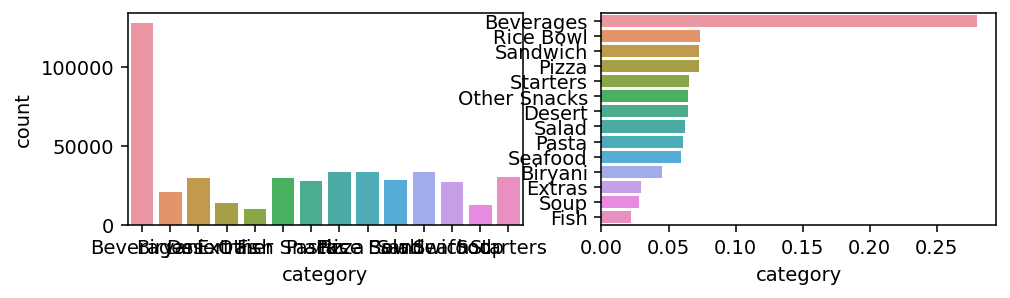

In [ ]:
UVA_cat(data, 'category')

Beverages appear to be the most commonly sold commodity across centers. Needs to be confirmed from No of orders...

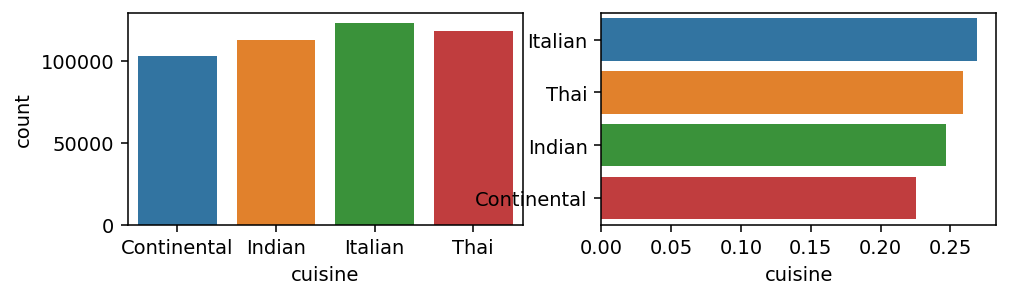

In [ ]:
UVA_cat(data, 'cuisine')

Italian appears to be the most commonly sold category of cuisine.

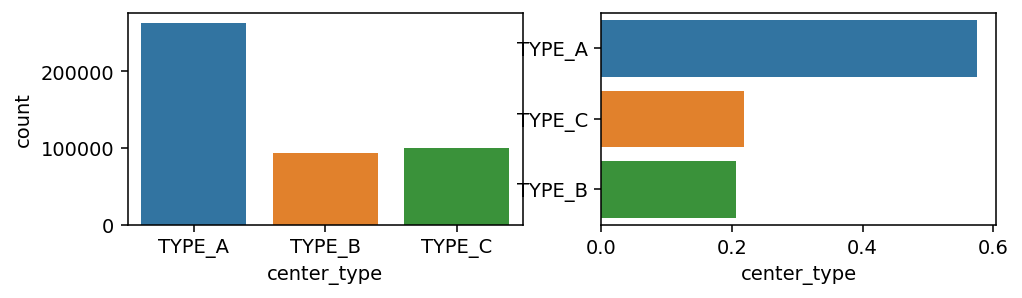

In [ ]:
UVA_cat(data, 'center_type')

Around 60% sales are reported from Type-A centers. Types B & C have almost equal contribution.

In [ ]:
# Checking for Missing values

data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

* There are NO Missing values anywhere.

# Bivariate Analysis



> ### Numerical-Numerical


In [ ]:
nums = data.select_dtypes(include=['int64', 'float64'])
nums.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,op_area
0,1379560,1,55,1885,136.83,152.29,177,647,56,2.0
1,1466964,1,55,1993,136.83,135.83,270,647,56,2.0
2,1346989,1,55,2539,134.86,135.86,189,647,56,2.0
3,1338232,1,55,2139,339.50,437.53,54,647,56,2.0
4,1448490,1,55,2631,243.50,242.50,40,647,56,2.0


In [ ]:
correlation = nums.dropna().corr()
correlation

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,-0.222306,-0.002054,-0.001934,0.018031
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,0.041596,1.000000,0.042686,0.131476
region_code,-0.000648,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,0.029744,0.042686,1.000000,0.023327
op_area,-0.000090,0.001550,-0.111869,-0.001546,0.021569,0.018031,0.176976,0.131476,0.023327,1.000000


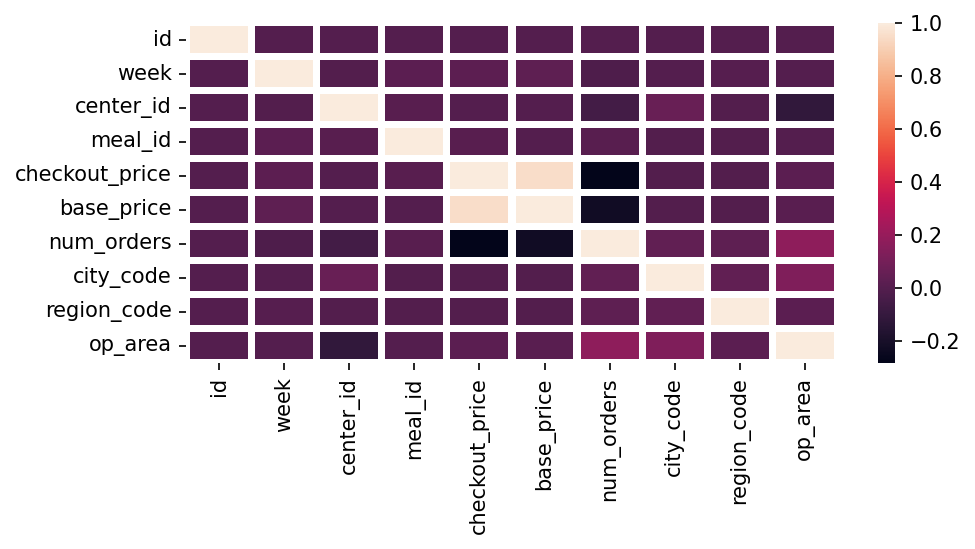

In [ ]:
plt.figure(figsize=(7,3), dpi=150)
sns.heatmap(data = correlation, linewidth = 3)



*   There is quite a strong correlation between base price and checkout price which is obvious.
*   There is a mild positive correlation between op_area and number of orders, probably because it determines the scope of outreach.
*   There is a negative correlation between No of orders and Base price, which is again due to obvious reasons.






**NUM_ORDERS TREND WITH TIME**

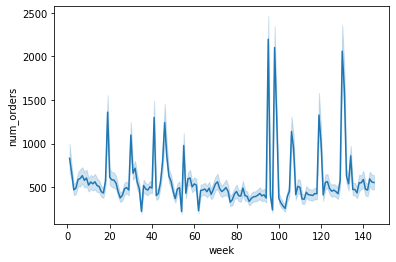

In [ ]:
sns.lineplot('week', 'num_orders', data=data[data['meal_id']==1109])

From the time series analysis of one particular meal item, it appears that apart from occasional surges in demand, their has been no appreciable increase in the num_orders for it, with the passage of time.

At certain weeks demand shoots up manifolds. ***Could there be a pattern or a specific predictable reason behind it?***

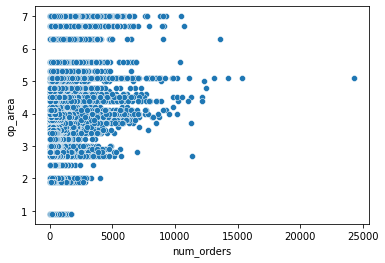

In [ ]:
sns.scatterplot('num_orders', 'op_area', data=nums)

Not much dependence of *No of orders* on *op_area* could be established.

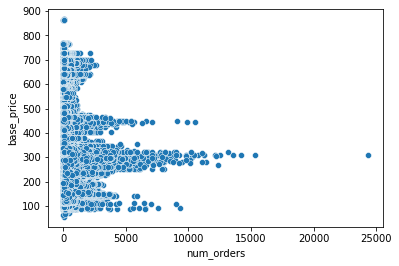

In [ ]:
sns.scatterplot('num_orders', 'base_price', data=nums)

In [ ]:
nums['num_orders'][nums['num_orders']>5000] = nums['num_orders'].mean()

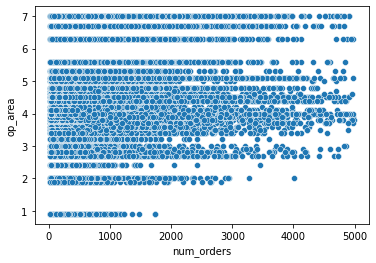

In [ ]:
sns.scatterplot('num_orders', 'op_area', data=nums)

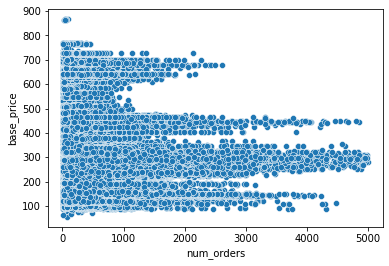

In [ ]:
sns.scatterplot('num_orders', 'base_price', data=nums)

Even after removal of outliers from Num_orders no clear dependency could be established between it and Base-price or Op-area.

In [ ]:
# Creating a new feature called "Discount"
data['discount'] = (data['base_price'] - data['checkout_price'])

In [ ]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-1.00
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-1.00


In [ ]:
data[['num_orders', 'discount']].corr()

,num_orders,discount
num_orders,1.00000,0.15295
discount,0.15295,1.00000


In [ ]:
data.meal_id.mode()

0    2290
dtype: int64

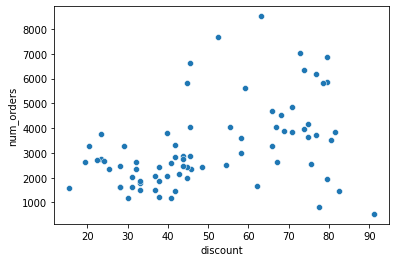

In [ ]:
subset = data.loc[(data['meal_id']==2290) & (data['week']==100)]
sns.scatterplot('discount', 'num_orders', data=subset)

In [ ]:
subset[['num_orders', 'discount']].corr()

,num_orders,discount
num_orders,1.000000,0.410593
discount,0.410593,1.000000


Mild correlation between discount and num orders for a particular meal and center.

In [ ]:
subset2 = data[(data['meal_id']==2290) & (data['week']==70)]
subset2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
208698,1318658,70,55,2290,311.37,312.37,0,0,258,Rice Bowl,Indian,647,56,TYPE_C,2.0,1.00
208734,1186011,70,24,2290,271.63,303.64,0,0,958,Rice Bowl,Indian,614,85,TYPE_B,3.6,32.01
208779,1154341,70,11,2290,268.72,268.72,0,0,1432,Rice Bowl,Indian,679,56,TYPE_A,3.7,0.00
208829,1127256,70,83,2290,255.17,253.17,0,0,1040,Rice Bowl,Indian,659,77,TYPE_A,5.3,-2.00
208870,1220773,70,32,2290,247.38,247.38,0,0,757,Rice Bowl,Indian,526,34,TYPE_A,3.8,0.00


In [ ]:
subset2[['num_orders', 'op_area']].corr()

,num_orders,op_area
num_orders,1.000000,0.764931
op_area,0.764931,1.000000


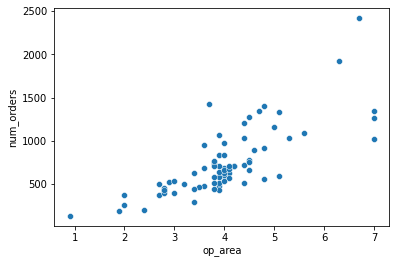

In [ ]:
sns.scatterplot('op_area', 'num_orders', data=subset2)

There appears to be moderately strong dependence of num orders on op_area, for certain particular meal items in a particular week.

Those certain meal items appear to be those that are main course popular items.

**CONCLUSION OF UVA**

Number of orders has a moderately strong correlation with op-area.

However its correlation with discount could not be strongly established.



> ### Numerical-Categorical



In [ ]:
data.dtypes

id                          int64
week                        int64
center_id                   int64
meal_id                     int64
checkout_price            float64
base_price                float64
emailer_for_promotion    category
homepage_featured        category
num_orders                  int64
category                 category
cuisine                  category
city_code                   int64
region_code                 int64
center_type              category
op_area                   float64
dtype: object

### Relationship between Emailer_for_Promotion and Num_orders

In [ ]:
subset0 = data.loc[(data['meal_id']==2290) & (data['center_id']==129)]

In [ ]:
table = pd.pivot_table(data=subset0, values='num_orders', columns='emailer_for_promotion', aggfunc=[np.mean, np.min, np.max, np.median])
table

mean              amin       amax       median  \
emailer_for_promotion           0            1    0    1     0     1      0   
num_orders             547.590909  2286.076923  109  730  2699  5697  527.5   

                               
emailer_for_promotion       1  
num_orders             2146.0

There is sufficient evidence to prove that on an average the num_orders(in a week) for a particular item was ***higher*** if it was **promoted through Email**.

In [ ]:
meal.head(51)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


### Relation between Homepage_feature and Num_Orders:

In [ ]:
pd.pivot_table(data=subset0, values='num_orders', columns='homepage_featured', aggfunc=[np.mean, np.median, np.min, np.max])

mean              median         amin       amax  \
homepage_featured           0            1      0       1    0    1     0   
num_orders         527.484375  2028.411765  526.5  2121.0  109  608  1108   

                         
homepage_featured     1  
num_orders         5697

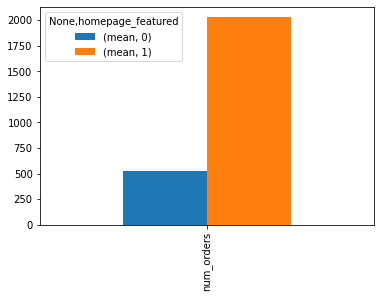

In [ ]:
table = pd.pivot_table(data=subset0, values='num_orders', columns='homepage_featured', aggfunc=[np.mean])
table.plot(kind='bar')

For any particular meal item, the Num_orders(in a week) was ***significantly higher*** if it was featured on the homepage.

This was concluded only after testing various food items.

### Relation between Center type and Num_orders:

In [ ]:
subset1 = data.loc[(data['week']==105)]

In [ ]:
table1 = pd.pivot_table(data=data, values='num_orders',index='meal_id', columns='center_type', aggfunc=[np.mean])
table1

mean                         
center_type      TYPE_A       TYPE_B      TYPE_C
meal_id                                         
1062         436.699278   504.641228  328.914275
1109         581.220209   855.148372  329.318298
1198         246.960593   347.442661  106.809339
1207         177.018027   118.204327  180.955412
1216          52.831699    78.557879   39.764151
1230         182.026872   109.312380  197.441188
1247          30.004832    44.854874   19.358696
1248          84.956061   113.168955   74.871447
1311         324.237800   491.150307  124.195198
1438          87.362679   119.689549   61.327563
1445         112.274469   141.852546   62.640042
1525         178.072440   317.248245   52.390940
1543          70.465478   117.156539   59.510833
1558         161.262122   153.778977  160.792523
1571          81.428060   137.126796   28.466292
1727         420.516760   552.452093  336.711378
1754         592.511479   626.228478  646.891794
1770          26.367188    38.696759   19.488844
1778         314.165944   350.427374  218.124362
1803         314.425757   478.817810  154.154812
1847          64.168724    83.481481   61.235054
1878         144.158596   250.790698   52.035538
1885         850.291466   978.001866  349.555269
1902          27.581951    45.376712   18.589286
1962         297.118356   358.103721  224.954695
1971         515.515429   500.226124  529.373178
1993         672.205297   747.563256  314.969298
2104          65.773932    87.310249   27.429603
2126          57.127550    99.981800   35.522850
2139          39.996014    62.294024   30.172414
2290         898.479551  1159.424651  608.616055
2304          57.123182    95.434675   47.349093
2306          57.182393    91.502634   35.147079
2322         228.043647   157.613894  205.197037
2444         106.525140   126.470737   68.689398
2490         387.777112   329.546317  487.557844
2492          52.022937    85.930330   45.990324
2494          88.438534   106.389061   56.336195
2539         327.123295   430.371457  169.615822
2569         331.319497   385.245425  375.348265
2577          99.949981   207.930773   39.730833
2581         215.653983   227.754664  210.274395
2631         100.501565   133.395916   89.166877
2640         196.124919   333.699535   63.162140
2664         361.614510   500.453742  391.219849
2704         159.119507   294.658191   45.927825
2707         575.413699   716.965116  293.606426
2760         134.775141   242.852474   50.795688
2826         472.826966   626.175349  298.137467
2867          84.400910   121.959661   48.828800
2956          70.726047   155.471014   23.763547

<Figure size 1800x600 with 0 Axes>

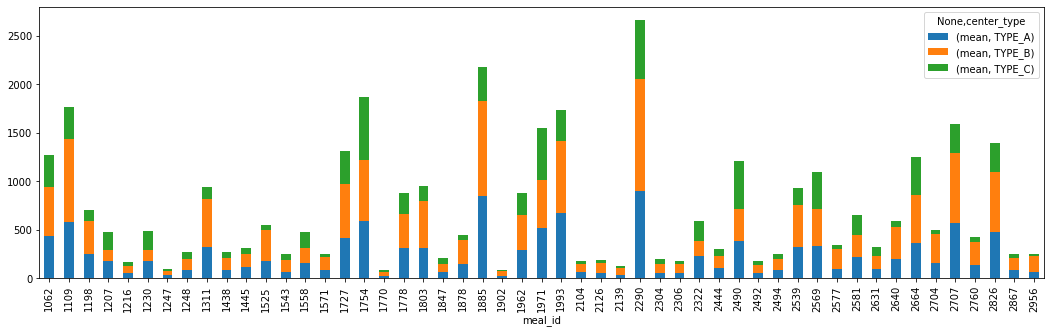

In [ ]:
plt.figure(figsize=(12,4), dpi=150)
table1.plot(kind='bar', stacked=True, figsize=(18,5))


Type C USUALLY always has the least Num_orders for any meal item in a certain week.

Type B USUALLY has the highest Num_orders for any meal_item in a certain week.

### Relationship between Meal_category and Num_orders:

In [ ]:
table2 = pd.pivot_table(data=data, values='num_orders', columns='category', aggfunc=np.mean)
table2

category,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters
num_orders,316.526116,30.651402,66.250905,293.834169,85.595268,162.234691,59.137142,222.817309,624.822288,383.21846,529.776276,100.895898,82.023353,155.27611


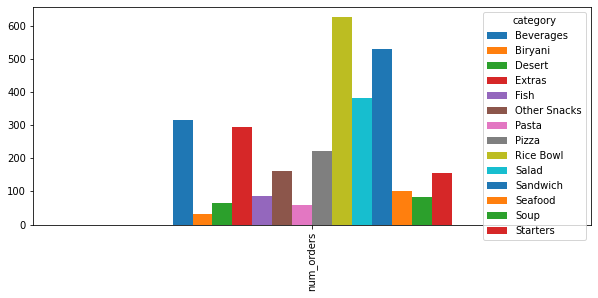

In [ ]:
table2.plot(kind='bar', figsize=(10,4))

Rice Bowl has the highest category wise number of orders. whereas Biryani occupies the lowest position.

### Relationship between Cuisine and Num_orders:


In [ ]:
table3 = pd.pivot_table(data=data, values='num_orders', columns='cuisine', aggfunc=np.mean)
table3

cuisine,Continental,Indian,Italian,Thai
num_orders,164.545348,229.039037,359.34783,276.423411


In [ ]:
# MORE GRANULAR SUMMARY OF SALES ON THE BASIS OF MEAL_CATEGORY AND CUISINE:

pd.pivot_table(data=data, values='num_orders', index='category', columns='cuisine', aggfunc=np.mean)

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,182.559624,80.075061,418.021329,558.425855
Biryani,NaN,30.651402,NaN,NaN
Desert,NaN,66.250905,NaN,NaN
Extras,NaN,NaN,NaN,293.834169
Fish,85.595268,NaN,NaN,NaN
Other Snacks,NaN,NaN,NaN,162.234691
Pasta,NaN,NaN,59.137142,NaN
Pizza,222.817309,NaN,NaN,NaN
Rice Bowl,NaN,624.822288,NaN,NaN


The highest selling item was Indian Rice Bowl.

The lowest selling item was Indian Biryani.

CERTAIN VARIABLES LIKE ***MEAL_ID, CENTER_ID, CITY_CODE AND REGION_CODE*** HAVE BEEN WRONGLY IDENTIFIED AS INT64, BUT THEY ACTUALLY BEHAVE LIKE CATEGORICAL DATATYPE

In [ ]:
table4 = pd.pivot_table(data=data, values='num_orders', index='meal_id', aggfunc=[np.mean]).style.background_gradient(cmap = 'summer_r')

In [ ]:
table4

,mean
,num_orders
meal_id,
1062,423.165574
1109,571.921412
1198,242.101759
1207,166.653341
1216,55.034966
1230,171.595850
1247,32.279649
1248,88.011872


* Meal Id has a certain relation with Num_orders.
* The max sold item on an average is 2290 Rice bowl Indian.
* The least sold item on an average is 1770 Indian Biryani.

Relation between Center_Id and Num_orders:


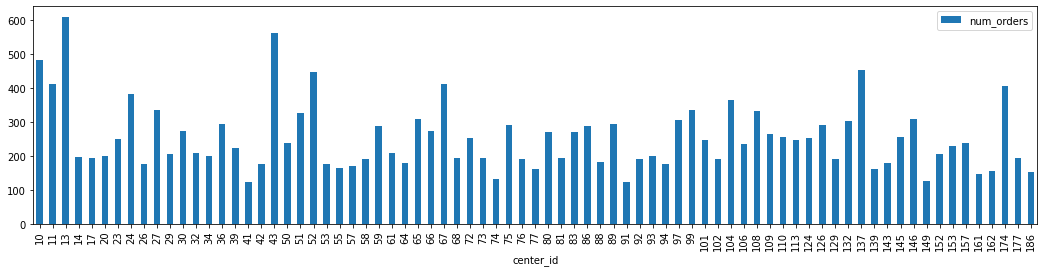

In [ ]:
table5 = pd.pivot_table(data=data, values='num_orders', index='center_id', aggfunc=np.mean)

table5.plot(kind='bar', figsize=(18,4))

=> It appears that center #13 turns out to be the bestseller in terms of average sales across all items.

### Relationship between City code and Num_orders:

In [ ]:
subset3 = data[data['meal_id']==2664]

In [ ]:
table6 = pd.pivot_table(data=subset3, values='num_orders', index='city_code', aggfunc=np.mean)


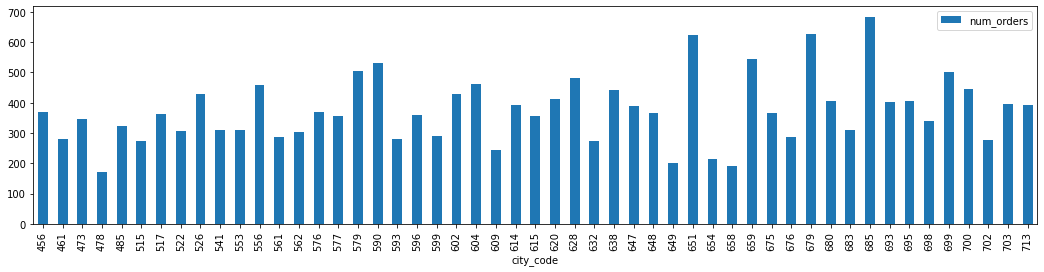

In [ ]:
table6.plot(kind='bar', figsize=(18,4))

In [ ]:
data.city_code.mode()

0    590
dtype: int64


* Those with average weekly sales of Indian Rice Bowl > 1000 could be deemed mega cities.

* Does there exist any pattern of high sales for every item for a constant bunch of cities, so that they can be declared as Mega cities?

### Relationship between Region code and Num_orders:


In [ ]:
subset4 = data[data['meal_id']==1754]

In [ ]:
table7 = pd.pivot_table(data=subset4, values='num_orders', index='region_code', aggfunc=np.mean)
table7

,num_orders
region_code,
23,559.455172
34,613.076012
35,273.000000
56,669.896988
71,701.551724
77,504.864503
85,694.070100
93,616.979310


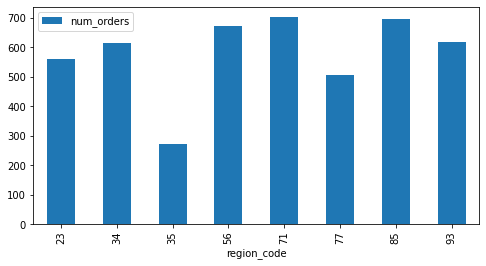

In [ ]:
table7.plot(kind='bar', figsize=(8,4))

From Analysis of City code and Region Code no definite relationship or patterns could be established with Num_Orders, because there is no information about the size of the city each city code represents.

So we can drop these 2 columns from our analysis.



> ### Categorical-Categorical



In [ ]:
# Rectifying mistaken datatypes:

data['meal_id'] = data['meal_id'].astype('category')
data['center_id'] = data['center_id'].astype('category')
data['city_code'] = data['city_code'].astype('category')
data['region_code'] = data['region_code'].astype('category')



In [ ]:
data.select_dtypes(include = 'category').dtypes

center_id                category
meal_id                  category
emailer_for_promotion    category
homepage_featured        category
category                 category
cuisine                  category
city_code                category
region_code              category
center_type              category
dtype: object

In [ ]:
pd.crosstab(data['emailer_for_promotion'], data['homepage_featured'])

homepage_featured,0,1
emailer_for_promotion,,
0,388874,30624
1,17819,19231


In [ ]:
pd.crosstab(data['category'], data['homepage_featured'])

homepage_featured,0,1
category,,
Beverages,113317,14573
Biryani,20554,60
Desert,25927,3367
Extras,13300,262
Fish,9779,408
Other Snacks,24570,4809
Pasta,23889,3805
Pizza,25552,7586
Rice Bowl,30450,2958


In [ ]:
pd.crosstab(data['center_id'], data['emailer_for_promotion'])

emailer_for_promotion,0,1
center_id,,
10,6558,457
11,6347,454
13,6589,457
14,5601,440
17,5887,446
...,...,...
161,5049,542
162,3950,416
174,6429,462


In [ ]:
pd.crosstab(data['cuisine'], data['emailer_for_promotion'])

emailer_for_promotion,0,1
cuisine,,
Continental,85832,16963
Indian,106278,6334
Italian,112333,10592
Thai,115055,3161


Conclusion for Categorical-Categorical analysis:
* It was observed that advertisements were not restricted to certain centers or meal categories. Ads were prevelant across all categories, there is no pattern of usage of application of ads to any category.

New feature engineered: Total Revenue

Total_Revenue = Num_orders x Checkout_price

In [ ]:
data['total_revenue'] = data['num_orders']*data['checkout_price']
data.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,total_revenue
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,24218.91
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,36944.10
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,25488.54
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,18333.00
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,9740.00
5,1270037,1,55,1248,251.23,252.23,0,0,28,Beverages,Indian,647,56,TYPE_C,2.0,7034.44
6,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian,647,56,TYPE_C,2.0,34838.40
7,1499955,1,55,1062,182.36,183.36,0,0,391,Beverages,Italian,647,56,TYPE_C,2.0,71302.76
8,1025244,1,55,2707,193.06,192.06,0,0,472,Beverages,Italian,647,56,TYPE_C,2.0,91124.32
9,1054194,1,55,1207,325.92,384.18,0,1,676,Beverages,Continental,647,56,TYPE_C,2.0,220321.92


In [ ]:
pd.pivot_table(data=data, values='total_revenue', index=['center_id', 'meal_id'], aggfunc=np.mean).sort_values(by='total_revenue', ascending=False).head(10).style.background_gradient(cmap='summer_r')

SHOWCASING THE ***TOP TEN*** PERFORMERS IN CENTER-MEAL COMBINATIONS

In [ ]:
pd.pivot_table(data=data, values='total_revenue', index=['center_id', 'meal_id'], aggfunc=np.mean).sort_values(by='total_revenue', ascending=False).tail(10).style.background_gradient(cmap='summer_r')

,,total_revenue
center_id,meal_id,
41,1248,4644.490000
139,1525,4501.641429
124,2494,4491.577349
92,2577,4218.463333
91,2631,4168.543478
41,1847,3670.543125
139,2577,3413.343333
57,2760,3400.420000
91,1438,3297.166667


SHOWCASING THE ***BOTTOM TEN*** PERFORMERS IN CENTER-MEAL COMBINATIONS